CSC461 Final Project

Dry Bean Classification

Morgan Martin, Abigail Becker, Melody Mitchell

In [21]:
# install packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Dry_Bean_Dataset.xlsx')

Our data, the Dry Bean Dataset, has 16 attributes and one target variable. We will perform some preliminary analysis to get a better idea of the data we're working with before preprocessing and modeling.

In [ ]:
data.shape

(13611, 17)

Our dataset has 13,611 rows and 17 columns. 

In [ ]:
# preview the first 5 rows of the dataset
data.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

After viewing the first 5 rows of the dataset, we see that there are 16 feature columns as well as the class column. We also see that our data is ordered, with seker being the first listed bean type. 

In [ ]:
# preliminary analysis
data['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

From the value counts, we can see that our data can be considered unbalanced. The count of each class ranges from 522 to 3546. There are many more observations of Dermason than any other bean type. We have a very low amount of Bombay class beans in this dataset. We may want to consider this imbalance when splitting the data into training and testing. We want to make sure that both training and testing have data for every class category.

In [ ]:
# summary of each variable
data.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

Since all of our features are numerical, the describe function provides comprehensive summaries of each variable. Firstly, from the count summary we know that none of the features have any missing or null data, which will greatly simplify our model creation in the later parts of this project. We can also see from these descriptions that certain features, such as area and perimeter, have quite large ranges of values whereas features such as eccentricity and solidity have very small ranges (less than one). This would lead us to believe that features with larger ranges may be more beneficial information when attempting to classify between the seven types of beans. 

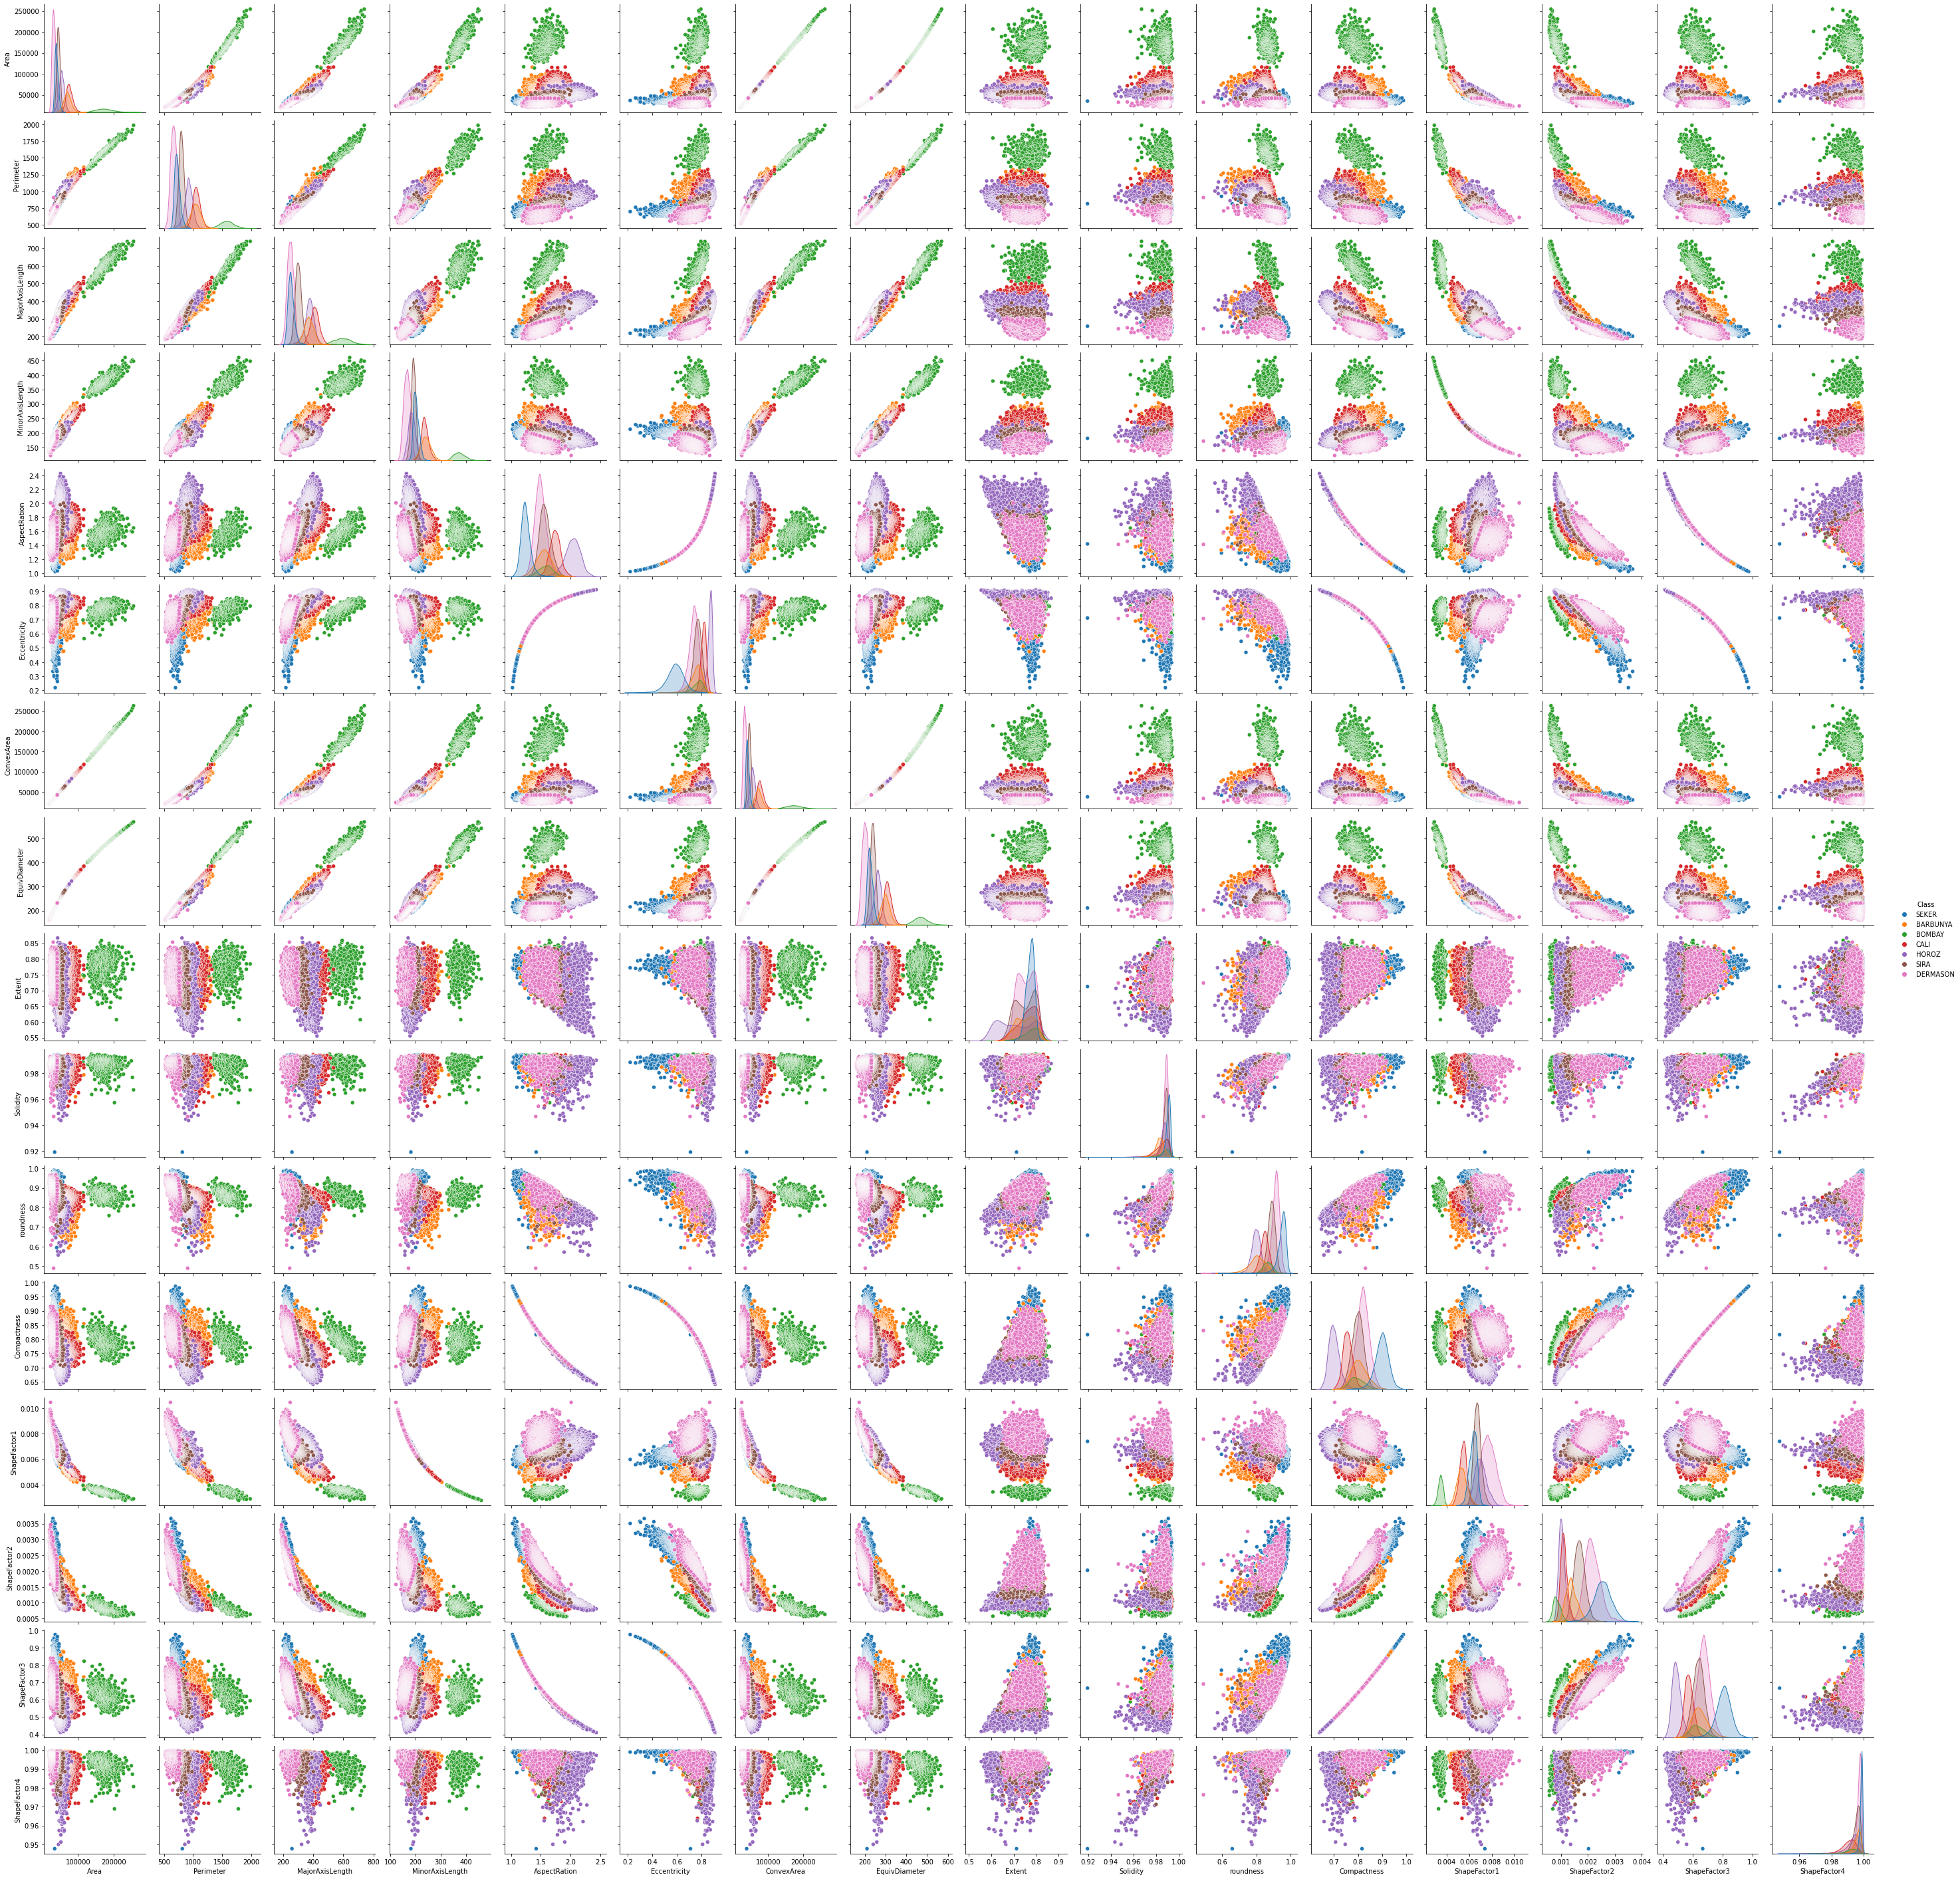

In [20]:
# scatter matrix
# we want to choose more significant variables to include in the scattermatrix
import seaborn as sns
sns.pairplot(data, hue='Class')

From the above scatterplot, we are able to make many inferences. Firstly, the cluster that seems to be the most dominant in many of the feature comparisons is green, which corresponds to the Bombay bean type. This also happens to be the class that is the most underrepresented within the dataset. We now know that this may be due to the major differences between Bombay and other bean types, therefore not needing as much data to accurately classify that type. 

In [ ]:
# split data
x = data.drop(['Class'], axis=1)
y = data['Class']

#training and testing
trainx, testx, trainy, testy = train_test_split(x, y)

print(np.shape(trainx),
np.shape(trainy),
np.shape(testx),
np.shape(testy))

# we have 10208 training points and 3403 testing points

print(trainy.value_counts(), testy.value_counts())

(10208, 16) (10208,) (3403, 16) (3403,)
DERMASON    2701
SIRA        2004
SEKER       1503
HOROZ       1448
CALI        1190
BARBUNYA     979
BOMBAY       383
Name: Class, dtype: int64 DERMASON    845
SIRA        632
SEKER       524
HOROZ       480
CALI        440
BARBUNYA    343
BOMBAY      139
Name: Class, dtype: int64


After splitting the data, we can see that the classes are generally balanced between testing and training, so we shouldn't have to worry about the imbalance of our data being an issue.

In [ ]:
# Preprocessing
# Ideas: L2 Regularization, PCA, StandardScaler
# Hyperparameter Search
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_scaled = sc.fit_transform(x)
x_scaled = pd.DataFrame(data=x_scaled, columns = x.columns)

x_scaled

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0     -0.840749  -1.143319        -1.306598        -0.631153     -1.565053   
1     -0.829188  -1.013924        -1.395911        -0.434445     -1.969784   
2     -0.807157  -1.078829        -1.252357        -0.585735     -1.514291   
3     -0.785741  -0.977215        -1.278825        -0.439290     -1.741618   
4     -0.781239  -1.097384        -1.380471        -0.266663     -2.117993   
...         ...        ...              ...              ...           ...   
13606 -0.373471  -0.446083        -0.366669        -0.363055     -0.123703   
13607 -0.373334  -0.456336        -0.450053        -0.257015     -0.432979   
13608 -0.372038  -0.447833        -0.450478        -0.246456     -0.448618   
13609 -0.371765  -0.427029        -0.428974        -0.266742     -0.380735   
13610 -0.371356  -0.387557        -0.291736        -0.446224      0.148374   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0         -2.185720   -0.841451      -1.063341  0.289087  0.367613   1.423867   
1         -3.686040   -0.826102      -1.044217  0.697477 -0.462907   0.231054   
2         -2.045336   -0.808704      -1.008084  0.578195  0.518417   1.252865   
3         -2.742211   -0.773975      -0.973337  0.671260 -2.241767   0.515049   
4         -4.535028   -0.784286      -0.966080  0.476020  0.804772   1.874992   
...             ...         ...            ...       ...       ...        ...   
13606      0.153343   -0.378191      -0.364148 -0.716284  0.684173   0.727872   
13607     -0.165141   -0.378662      -0.363962  1.022933  0.774384   0.818807   
13608     -0.182940   -0.376143      -0.362197 -0.403392  0.591370   0.758468   
13609     -0.106960   -0.372851      -0.361825 -0.903414  0.143717   0.581753   
13610      0.389116   -0.375101      -0.361268  0.799227  0.537539   0.253681   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0         1.839116      0.680786      2.402173      1.925723      0.838371  
1         2.495449      0.367967      3.100893      2.689702      0.771138  
2         1.764843      0.603129      2.235091      1.841356      0.916755  
3         2.081715      0.401718      2.515075      2.204250     -0.197985  
4         2.765330      0.118268      3.270983      3.013462      0.939640  
...            ...           ...           ...           ...           ...  
13606     0.032433      0.261425      0.055630     -0.006086      0.760813  
13607     0.362794      0.110384      0.285117      0.328393      0.722659  
13608     0.370533      0.104269      0.289204      0.336328      0.390251  
13609     0.285098      0.141906      0.228375      0.248973      0.036440  
13610    -0.240904      0.387512     -0.127776     -0.276481      0.713719  

[13611 rows x 16 columns]

In [22]:
# importing 
# pandas used to create dataframe
import pandas as pd

# calculates accuracy of model
from sklearn.metrics import accuracy_score

import numpy as np
np.set_printoptions(formatter={'float_kind':"{:3.2f}".format})
from sklearn.model_selection import cross_val_score
import seaborn as sns
# to do grid search
from sklearn.model_selection import GridSearchCV
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
# confidence interval
def classification_confint(acc, n):
    '''
    Compute the 95% confidence interval for a classification problem.
      acc -- classification accuracy
      n   -- number of observations used to compute the accuracy
    Returns a tuple (lb,ub)
    '''
    interval = 1.96*math.sqrt(acc*(1-acc)/n)
    lb = max(0, acc - interval)
    ub = min(1.0, acc + interval)
    return (lb,ub)

In [ ]:
# KNN
model = KNeighborsClassifier()

# grid search
param_grid = {'n_neighbors': list(range(1,50))}
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(x, y)
print("Grid Search: best parameters: {}".format(grid.best_params_))

# accuracy of best model with confidence interval
best_model = grid.best_estimator_
predict_y = best_model.predict(x)
acc = accuracy_score(y, predict_y)
lb,ub = classification_confint(acc,x.shape[0])
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc,lb,ub))

Grid Search: best parameters: {'n_neighbors': 49}
Accuracy: 0.69 (0.68,0.70)


In [ ]:
# KNN
model = KNeighborsClassifier()

# grid search
param_grid = {'n_neighbors': list(range(1,50))}
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(x_scaled, y)
print("Grid Search: best parameters: {}".format(grid.best_params_))

# accuracy of best model with confidence interval
best_model = grid.best_estimator_
predict_y = best_model.predict(x_scaled)
acc = accuracy_score(y, predict_y)
lb,ub = classification_confint(acc,x_scaled.shape[0])
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc,lb,ub))

Grid Search: best parameters: {'n_neighbors': 48}
Accuracy: 0.92 (0.92,0.93)


>0.0000 0.703 (0.012)
>0.0001 0.709 (0.016)
>0.0010 0.705 (0.016)
>0.0100 0.706 (0.015)
>0.1000 0.704 (0.015)
>1.0000 0.703 (0.013)


{'whiskers': [<matplotlib.lines.Line2D at 0x7fdc6c1457f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdc6c145eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdc6c145490>,
 'medians': [<matplotlib.lines.Line2D at 0x7fdc6c12e5b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdc6c12ec10>,
 'means': [<matplotlib.lines.Line2D at 0x7fdc6c12e8b0>,
  <matplotlib.lines.Line2D at 0x7fdc6bd5b280>]}

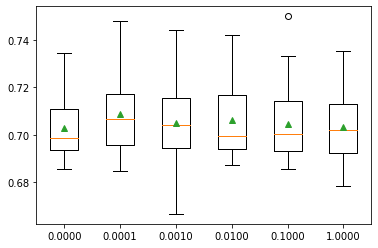

In [ ]:
# Multinomial Logistic Regression
# get different multinomial logistic regression models to test
def mlrmodels():
  models = dict()
  for p in [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0]:
    name = '%.4f' % p
    if p == 0.0:
      models[name] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty = 'none')
    else:
      models[name] = LogisticRegression(multi_class='multinomial', solver = 'lbfgs', penalty = 'l2', C=p)
  return models

# evaluate each model with cross val
def evaluation(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  return scores

#get models
models = mlrmodels()
results = list()
names = list()
for name, model in models.items():
  scores = evaluation(model, x, y)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

#plot model evaluations
plt.boxplot(results, labels=names, showmeans=True)

>0.0000 0.924 (0.007)
>0.0001 0.643 (0.009)
>0.0010 0.900 (0.009)
>0.0100 0.919 (0.007)
>0.1000 0.924 (0.007)
>1.0000 0.924 (0.006)


{'whiskers': [<matplotlib.lines.Line2D at 0x7fdc6b603880>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdc6b603f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdc6b603520>,
 'medians': [<matplotlib.lines.Line2D at 0x7fdc6b60a640>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdc6b60aca0>,
 'means': [<matplotlib.lines.Line2D at 0x7fdc6b60a940>,
  <matplotlib.lines.Line2D at 0x7fdc6b5e13a0>]}

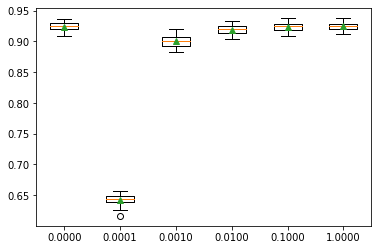

In [ ]:
# Multinomial Logistic Regression with scaled data
models = mlrmodels()
results = list()
names = list()
for name, model in models.items():
  scores = evaluation(model, x_scaled, y)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

#plot model evaluations
plt.boxplot(results, labels=names, showmeans=True)

In [ ]:
# MLP
# neural network
model = MLPClassifier(max_iter=10000)

# grid search
param_grid = {'hidden_layer_sizes': [(10,),(11,),(12,),(13,),(14,),(15,),(16,),(17,),(18,),(19,),(20,)],
               'activation': ['relu', 'logistic']}
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(x, y)
print("Grid Search: best parameters: {}".format(grid.best_params_))

# evaluate the best model
best_model = grid.best_estimator_
predict_y = best_model.predict(x)
acc = accuracy_score(y, predict_y)
lb,ub = classification_confint(acc,x.shape[0])
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc,lb,ub))

Grid Search: best parameters: {'activation': 'relu', 'hidden_layer_sizes': (16,)}
Accuracy: 0.46 (0.45,0.47)


In [ ]:
# MLP
# neural network
model = MLPClassifier(max_iter=10000)

# grid search
param_grid = {'hidden_layer_sizes': [(10,),(11,),(12,),(13,),(14,),(15,),(16,),(17,),(18,),(19,),(20,)],
               'activation': ['relu', 'logistic']}
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(x_scaled, y)
print("Grid Search: best parameters: {}".format(grid.best_params_))

# evaluate the best model
best_model = grid.best_estimator_
predict_y = best_model.predict(x_scaled)
acc = accuracy_score(y, predict_y)
lb,ub = classification_confint(acc,x_scaled.shape[0])
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc,lb,ub))

Grid Search: best parameters: {'activation': 'logistic', 'hidden_layer_sizes': (19,)}
Accuracy: 0.93 (0.93,0.94)


In [ ]:
#SVM
from sklearn.svm import SVC
# SVM model
model = SVC(max_iter=10000)

# grid search
param_grid = [
  {'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 'kernel': ['linear']},
 ]
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(x, y)
print("Grid Search: best parameters: {}".format(grid.best_params_))

# evaluate the best model
best_model = grid.best_estimator_
predict_y = best_model.predict(x)
acc = accuracy_score(y, predict_y)
lb,ub = classification_confint(acc,x.shape[0])
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc,lb,ub))

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider

Grid Search: best parameters: {'C': 1e-05, 'kernel': 'linear'}
Accuracy: 0.54 (0.54,0.55)


In [ ]:
#SVM
from sklearn.svm import SVC
# SVM model
model = SVC(max_iter=10000)

# grid search
param_grid = [
  {'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 'kernel': ['linear']},
 ]
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(x_scaled, y)
print("Grid Search: best parameters: {}".format(grid.best_params_))

# evaluate the best model
best_model = grid.best_estimator_
predict_y = best_model.predict(x_scaled)
acc = accuracy_score(y, predict_y)
lb,ub = classification_confint(acc,x_scaled.shape[0])
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc,lb,ub))

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider

Grid Search: best parameters: {'C': 0.001, 'kernel': 'linear'}
Accuracy: 0.91 (0.91,0.92)
